<a href="https://colab.research.google.com/github/Dennieeeee/Medical-Cost-and-Diseases/blob/master/Cardiovascular_%E5%BF%83%E8%A1%80%E7%AE%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
All of the dataset values were collected at the moment of medical examination.

Data Source: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

# Features Definition

Age: age

Height:	height	int (cm)

Weight: weight	float (kg)

Gender: woman or man

ap_hi: Systolic blood pressure	Examination Feature

ap_lo: Diastolic blood pressure	Examination Feature		int

Cholesterol: Examination Feature (cholesterol	1: normal, 2: above normal, 3: well above normal)

gluc: Glucose	Examination Feature	gluc (1: normal, 2: above normal, 3: well above normal)

smoke: Smoking	Subjective Feature	binary

alco: Alcohol intake	Subjective Feature binary

active: Physical activity	Subjective Feature binary

cardio: Presence or absence of cardiovascular disease	Target Variable	binary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split model
from sklearn.model_selection import train_test_split
# regression models development
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('cardio_train.csv', sep=";")

In [3]:
df.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

The age variable is actually age in days. So, we want to see in years.

In [6]:
df_cleaned = df.rename(columns={'age':'age_days'})

In [7]:
df_cleaned['age'] = round(df_cleaned['age_days'] / 365)

In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning and Outliers

In [9]:
print('There are {} duplicated records in this dataset.'.format(df.duplicated().sum()))

There are 0 duplicated records in this dataset.


In [10]:
df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))

Total 70000 datapoints remaining with 13 features


In [11]:
starting_percentile = df['age'].quantile(.05)
ending_percentile = df['age'].quantile(.95)
outliers_df = df.loc[((df['age'] <= starting_percentile) | (df['age'] >= ending_percentile))]
custom_clean = df.loc[((df['age'] > starting_percentile) & (df['age'] < ending_percentile))]

# EDA

In [12]:
x = df.copy()

In [13]:
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
x_std=standartization(x)
x_std.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,-0.436058,2,0.443449,-0.847867,-0.122181,-0.088238,1,1,0,0,1,0
1,1,0.307684,1,-1.018161,0.749826,0.072610,-0.035180,3,1,0,0,1,1
2,2,-0.247995,1,0.078046,-0.708937,0.007679,-0.141296,3,1,0,0,0,1
3,3,-0.748147,2,0.565250,0.541431,0.137540,0.017878,1,1,0,0,1,1
4,4,-0.808538,1,-1.018161,-1.264657,-0.187111,-0.194354,1,1,0,0,0,0


In order to plot all boxplots in one chart, we need to melt it.

In [14]:
x_melted = pd.melt(frame=x_std, id_vars="cardio", value_vars=s_list, var_name="features", value_name="value", col_level=None)
x_melted.head(3)

,cardio,features,value
0,0,age,-0.436058
1,1,age,0.307684
2,1,age,-0.247995


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


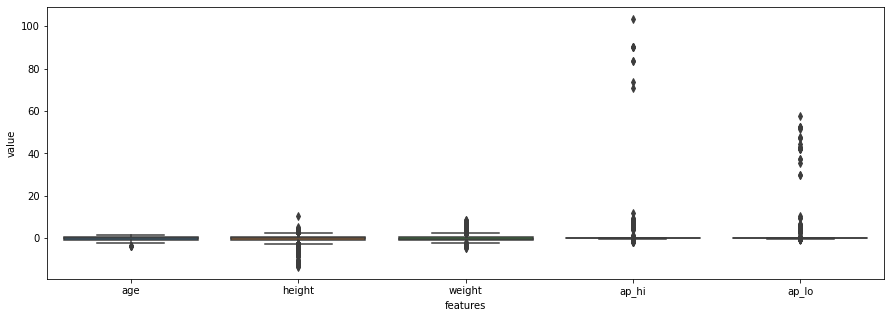

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot('features', 'value', data=x_melted)

Outliers are points outside the minimum and maximum range of a boxplot.

Minimum (lower outlier) = Q1 - (1.5 * IQR)

Maximum (upper outlier) = Q3 + (1.5 * IQR)

ap_hi and ap_lo outliers are calculated below.

In [16]:
ap_list = ["ap_hi", "ap_lo"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) # We created an empty dataframe
for each in ap_list:
    Q1 = x[each].quantile(0.25)
    Q3 = x[each].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]
boundary

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


In [17]:
ap_hi_filter = (x["ap_hi"] > boundary["ap_hi"][1])
ap_lo_filter = (x["ap_lo"] > boundary["ap_lo"][1])                                                           
outlier_filter = (ap_hi_filter | ap_lo_filter)
x_outliers = x[outlier_filter]
x_outliers["cardio"].value_counts()

1    2025
0     388
Name: cardio, dtype: int64

Drop outliers

In [18]:
out_filter = ((x["ap_hi"]>250) | (x["ap_lo"]>200) )
print("There is {} outlier".format(x[out_filter]["cardio"].count()))

There is 993 outlier


In [19]:
df_cleaned = x[~out_filter]

In [20]:
print('The original data shape: ', df.shape)
print('The cleaned data shape: ', df_cleaned.shape)

The original data shape:  (70000, 13)
The cleaned data shape:  (69007, 13)


Add new feature: bmi

In [21]:
df_cleaned['bmi'] = round(df_cleaned['weight'] / (df_cleaned['height'] / 100) ** 2, 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# EDA

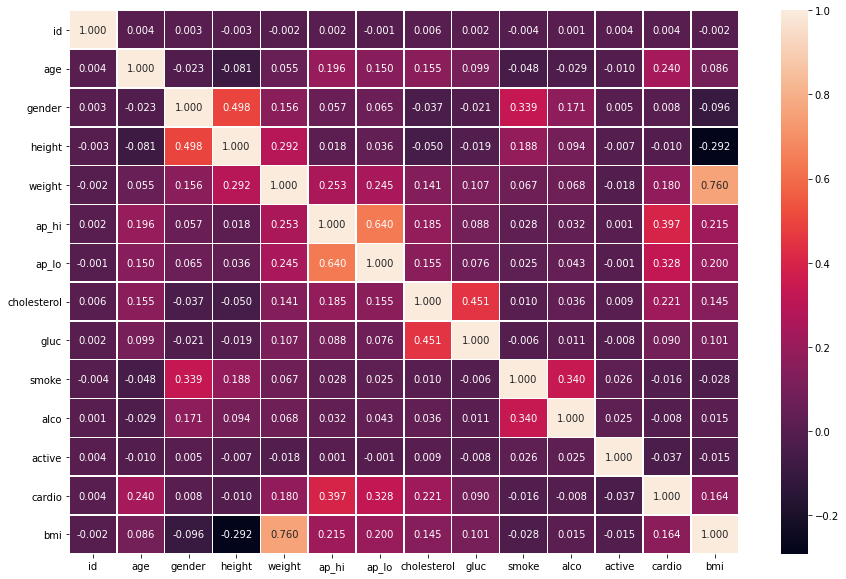

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cleaned.corr(), fmt=".3f", linewidths=0.5, annot=True)

A number of things we can see easily from correlation map:
1. cholesterol, blood pressure (ap_hi and ap_low both) and age have a powerful relationship with cardiovascular diseases.

2. Glucogen and cholesterol have a strong relationship among them either.

3. Alcohol intake and physical activity have a negative correlation with cardiovascular diseases. This means that by reduce the alcohol intake and increase physical activity can prevent cardiovascular diseases.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


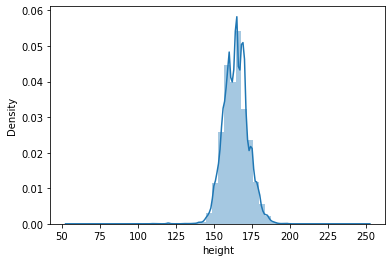

In [32]:
sns.distplot(df_cleaned['height'])
# 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


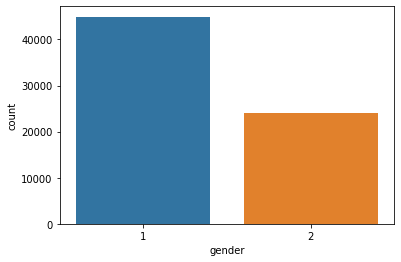

In [34]:
sns.countplot(df_cleaned['gender'])
# 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'

Detect gender

In [23]:
df.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0


In [24]:
df_cleaned.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi'],
      dtype='object')

# Model Development

In [25]:
y=df_cleaned['cardio'] # define the target variable
#x=df_cleaned[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]
x = df_cleaned.drop('cardio', axis=1)

In [26]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train = normalize(x_train)
x_test = normalize(x_test)
x = normalize(x)

In [28]:
dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)
  

In [29]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random forest,0.713302
Decision tree,0.620997
KNN,0.573757
Naive bayes,0.538980
SVM,0.519128


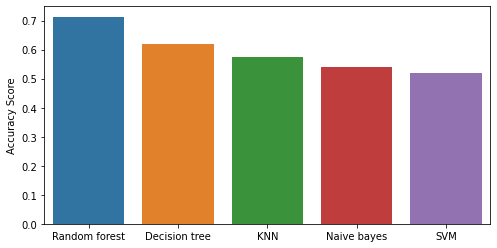

In [30]:
plt.figure(figsize=(8,4))
sns.barplot(x=scores_frame.index, y=scores_frame['Accuracy Score'])
#plt.xticks(rotation=45)